In [11]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:120% !important; }</style>"))

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import shap
import numpy as np
import seaborn as sns
import os
from datetime import date
from sklearn import metrics
import catboost as cb

In [2]:
os.chdir("/home/robson/Documents/Mestrado/Pesquisa/mestrado_num_casos_doenca")
base_path = os.getcwd()
from machine_learning.mlMethods import *
from machine_learning.measuringResults import *
from machine_learning.visualization import *
from machine_learning.regression_metrics import *
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, f1_score, recall_score, precision_score
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.over_sampling import SMOTE
from statsmodels.tsa.statespace.sarimax import SARIMAX
import dateutil
import contextily as ctx
import geopandas as gpd
import geoplot

In [3]:
selected_columns = ['qtd_cnes', 'precipitacao (mm)-1', 'temperatura (°C)-1',
       'umidade ar (%)-1', 'sum_vizinhos_t-1',
       't-1', 't-2', 't-3', 'densidade_demografica',
       'zika-1', 'chikungunya-1', 'critical_neighbor', 'liraa']

selected_columns_shape = ['qtd_cnes', 'precipitacao (mm)-1', 'temperatura (°C)-1',
       'umidade ar (%)-1', 'sum_vizinhos_t-1',
       't-1', 't-2', 't-3', 'zika-1', 'chikungunya-1', 'critical_neighbor', 'liraa']

dengue_columns = ['t-1', 't-2', 't-3', 'sum_vizinhos_t-1', 'dengue_diagnosis']
categorical_columns = []
columns_filtered_categorical = []
neighbor_columns=['sum_vizinhos_t-1']
log_flag = False
target = 'dengue_diagnosis'
year_begin = 2015
year_end = 2020
list_year = list(range(year_begin, year_end+1))
model = "catboost"
standart = False
months = list(range(1, 13))
months_ahead = 3
file_name = f"{year_begin}_{year_end}_{months_ahead}_months"
fontsize = 35

In [ ]:
# Consolidate the results for differents years as a train dataset
shap_values_consolidated = pd.DataFrame(columns=selected_columns_shape)
x_train_consolidated = pd.DataFrame(columns=selected_columns_shape)

df_train_cons = pd.DataFrame(columns=['nome_bairro', 'ano', 'mes'])

a = 2016

df_train, df_test, x_train, y_train = run_main_first_step_1_v2(target,
                                                               ano_teste=a,
                                                               log=False,
                                                               mes_inicio_teste=3,
                                                               dengue_columns=dengue_columns,
                                                               columns_filtered=selected_columns,
                                                               categorical_columns=categorical_columns,
                                                               columns_filtered_categorical=columns_filtered_categorical,
                                                               quartil=True
                                                               )

regressor, r2 = run_catboost(x_train, y_train, grid_search=False, standart=standart)

explainer = shap.TreeExplainer(regressor)
shap_values = explainer.shap_values(x_train, check_additivity=False, )
shap_values = pd.DataFrame(shap_values, columns=x_train.columns)
shap_values_consolidated = shap_values_consolidated.append(shap_values)
x_train_consolidated = x_train_consolidated.append(x_train)

x_train_consolidated.columns = ['num_health_unit', 'precipitation (mm)', 'temperature (°C)',
           'air_humidity (%)', 'neighbor_cases', 'cases_m-1', 'cases_m-2', 'cases_m-3', 'zika', 'chikungunya',
            'critical_neighbor', 'liraa', 'demographic density']

df_train_cons = df_train_cons.append(df_train[['nome_bairro', 'ano', 'mes']])
x_train_consolidated['critical_neighbor'] = x_train_consolidated['critical_neighbor'].apply(lambda x: round(x, 2))


shap_values_consolidated_values = shap_values_consolidated.values

In [ ]:
i = 394
f = plt.figure(figsize=(20, 30), dpi=180)
#shap.force_plot(explainer.expected_value, shap_values_consolidated_values[i, :], x_train_consolidated.iloc[i, :], matplotlib=True, show=False)
shap.decision_plot(explainer.expected_value, shap_values_consolidated_values[i, :], x_train_consolidated.iloc[i, :], show=False)
plt.xticks(fontsize=16)
#plt.title(f"Real Value: {df_train.iloc[i, 1]}", fontsize=18)
plt.savefig(base_path + '/data_sus/finais/article_data/figure_6_shap_force_plot.eps', dpi=180)
plt.show()
# Real value: 29

In [ ]:
i = 394
f = plt.figure(figsize=(20, 30), dpi=180)
shap.force_plot(explainer.expected_value, shap_values_consolidated_values[i, :], x_train_consolidated.iloc[i, :], matplotlib=True, show=False)
plt.xticks(fontsize=16)
plt.title(f"Real Value: {df_train.iloc[i, 1]}", fontsize=18)
plt.savefig(base_path + '/data_sus/finais/article_data/figure_6_shap_force_plot.eps', dpi=180)
plt.show()
# Real value: 29

In [ ]:
i = 5
f = plt.figure(figsize=(15, 30), dpi=180)
shap.force_plot(explainer.expected_value, shap_values_consolidated_values[i, :], x_train_consolidated.iloc[i, :], matplotlib=True, show=False)
plt.xticks(fontsize=16)
plt.title(f"Real Value: {df_train.iloc[i, 1]}", fontsize=18)
plt.savefig(base_path + '/data_sus/finais/article_data/figure_6_shap_force_plot.eps', dpi=180)
plt.show()
# Real value: 8

In [ ]:
i = 388
f = plt.figure(figsize=(20, 30), dpi=180)
shap.force_plot(explainer.expected_value, shap_values_consolidated_values[i, :], x_train_consolidated.iloc[i, :], matplotlib=True, show=False)
plt.xticks(fontsize=16)
plt.title(f"Real Value: {df_train.iloc[i, 1]}", fontsize=18)
#plt.savefig(base_path + '/data_sus/finais/article_data/figure_6_shap_force_plot.eps', dpi=180)
plt.show()
# Real value: 969

In [ ]:
i = 430
f = plt.figure(figsize=(20, 30), dpi=180)
shap.force_plot(explainer.expected_value, shap_values_consolidated_values[i, :], x_train_consolidated.iloc[i, :], matplotlib=True, show=False)
plt.xticks(fontsize=16)
plt.title(f"Real Value: {df_train.iloc[i, 1]}", fontsize=18)
#plt.savefig(base_path + '/data_sus/finais/article_data/figure_6_shap_force_plot.eps', dpi=180)
plt.show()
# Real value: 649

In [4]:
df_train, df_test, x_train, y_train = run_main_first_step_1_v2(target,
                                                               ano_teste=2016,
                                                               log=False,
                                                               mes_inicio_teste=1,
                                                               dengue_columns=dengue_columns,
                                                               columns_filtered=selected_columns,
                                                               categorical_columns=categorical_columns,
                                                               columns_filtered_categorical=columns_filtered_categorical,
                                                               quartil=True
                                                               )

regressor, r2 = run_catboost(x_train, y_train, grid_search=False, standart=standart)

explainer = shap.TreeExplainer(regressor)
df_shap = pd.DataFrame(explainer.shap_values(x_train, check_additivity=False), columns=x_train.columns)
shap_values = df_shap.values

0:	learn: 19.7684887	total: 65.5ms	remaining: 1m 5s
1:	learn: 18.7382743	total: 72.3ms	remaining: 36.1s
2:	learn: 17.7785704	total: 78.9ms	remaining: 26.2s
3:	learn: 17.1091316	total: 83.2ms	remaining: 20.7s
4:	learn: 16.4224955	total: 88ms	remaining: 17.5s
5:	learn: 15.7694789	total: 92.8ms	remaining: 15.4s
6:	learn: 15.2459970	total: 97.6ms	remaining: 13.8s
7:	learn: 14.6871381	total: 103ms	remaining: 12.7s
8:	learn: 14.1143243	total: 107ms	remaining: 11.8s
9:	learn: 13.6445142	total: 112ms	remaining: 11.1s
10:	learn: 13.1676773	total: 117ms	remaining: 10.5s
11:	learn: 12.6916097	total: 123ms	remaining: 10.1s
12:	learn: 12.2966369	total: 128ms	remaining: 9.69s
13:	learn: 11.8984713	total: 133ms	remaining: 9.39s
14:	learn: 11.5635441	total: 138ms	remaining: 9.09s
15:	learn: 11.1984868	total: 144ms	remaining: 8.83s
16:	learn: 10.8974627	total: 149ms	remaining: 8.59s
17:	learn: 10.5189461	total: 154ms	remaining: 8.42s
18:	learn: 10.2347644	total: 159ms	remaining: 8.23s
19:	learn: 9.9414

169:	learn: 3.5677948	total: 1.29s	remaining: 6.28s
170:	learn: 3.5566069	total: 1.29s	remaining: 6.28s
171:	learn: 3.5453437	total: 1.3s	remaining: 6.27s
172:	learn: 3.5336175	total: 1.31s	remaining: 6.26s
173:	learn: 3.5178982	total: 1.31s	remaining: 6.24s
174:	learn: 3.5141416	total: 1.32s	remaining: 6.21s
175:	learn: 3.5028323	total: 1.32s	remaining: 6.2s
176:	learn: 3.4968243	total: 1.33s	remaining: 6.18s
177:	learn: 3.4892740	total: 1.33s	remaining: 6.16s
178:	learn: 3.4860052	total: 1.34s	remaining: 6.14s
179:	learn: 3.4816804	total: 1.34s	remaining: 6.12s
180:	learn: 3.4779771	total: 1.35s	remaining: 6.1s
181:	learn: 3.4718088	total: 1.35s	remaining: 6.08s
182:	learn: 3.4668691	total: 1.36s	remaining: 6.06s
183:	learn: 3.4612078	total: 1.36s	remaining: 6.04s
184:	learn: 3.4556612	total: 1.37s	remaining: 6.02s
185:	learn: 3.4492840	total: 1.37s	remaining: 6.01s
186:	learn: 3.4449887	total: 1.38s	remaining: 5.99s
187:	learn: 3.4375476	total: 1.38s	remaining: 5.98s
188:	learn: 3.4

330:	learn: 2.6030966	total: 2.29s	remaining: 4.63s
331:	learn: 2.5989971	total: 2.3s	remaining: 4.63s
332:	learn: 2.5952539	total: 2.31s	remaining: 4.63s
333:	learn: 2.5883149	total: 2.32s	remaining: 4.63s
334:	learn: 2.5827430	total: 2.33s	remaining: 4.62s
335:	learn: 2.5759619	total: 2.34s	remaining: 4.62s
336:	learn: 2.5696963	total: 2.34s	remaining: 4.61s
337:	learn: 2.5678031	total: 2.35s	remaining: 4.6s
338:	learn: 2.5660122	total: 2.35s	remaining: 4.59s
339:	learn: 2.5598202	total: 2.36s	remaining: 4.58s
340:	learn: 2.5581352	total: 2.37s	remaining: 4.57s
341:	learn: 2.5531374	total: 2.37s	remaining: 4.56s
342:	learn: 2.5514139	total: 2.38s	remaining: 4.55s
343:	learn: 2.5466844	total: 2.38s	remaining: 4.54s
344:	learn: 2.5448275	total: 2.39s	remaining: 4.53s
345:	learn: 2.5396416	total: 2.39s	remaining: 4.52s
346:	learn: 2.5330566	total: 2.4s	remaining: 4.51s
347:	learn: 2.5295315	total: 2.4s	remaining: 4.5s
348:	learn: 2.5248534	total: 2.41s	remaining: 4.49s
349:	learn: 2.521

498:	learn: 2.0495899	total: 3.29s	remaining: 3.31s
499:	learn: 2.0475968	total: 3.3s	remaining: 3.3s
500:	learn: 2.0442069	total: 3.31s	remaining: 3.29s
501:	learn: 2.0412289	total: 3.31s	remaining: 3.29s
502:	learn: 2.0375628	total: 3.32s	remaining: 3.28s
503:	learn: 2.0346752	total: 3.32s	remaining: 3.27s
504:	learn: 2.0315909	total: 3.33s	remaining: 3.26s
505:	learn: 2.0303362	total: 3.33s	remaining: 3.25s
506:	learn: 2.0293046	total: 3.34s	remaining: 3.25s
507:	learn: 2.0279575	total: 3.35s	remaining: 3.24s
508:	learn: 2.0269980	total: 3.35s	remaining: 3.23s
509:	learn: 2.0245936	total: 3.36s	remaining: 3.23s
510:	learn: 2.0213120	total: 3.36s	remaining: 3.22s
511:	learn: 2.0195553	total: 3.37s	remaining: 3.21s
512:	learn: 2.0181918	total: 3.37s	remaining: 3.2s
513:	learn: 2.0147150	total: 3.38s	remaining: 3.19s
514:	learn: 2.0127722	total: 3.38s	remaining: 3.19s
515:	learn: 2.0105531	total: 3.39s	remaining: 3.18s
516:	learn: 2.0078184	total: 3.39s	remaining: 3.17s
517:	learn: 2.0

660:	learn: 1.7271791	total: 4.31s	remaining: 2.21s
661:	learn: 1.7255518	total: 4.32s	remaining: 2.21s
662:	learn: 1.7236298	total: 4.33s	remaining: 2.2s
663:	learn: 1.7220948	total: 4.34s	remaining: 2.19s
664:	learn: 1.7208764	total: 4.34s	remaining: 2.19s
665:	learn: 1.7197444	total: 4.35s	remaining: 2.18s
666:	learn: 1.7175727	total: 4.35s	remaining: 2.17s
667:	learn: 1.7155743	total: 4.36s	remaining: 2.17s
668:	learn: 1.7134312	total: 4.37s	remaining: 2.16s
669:	learn: 1.7118779	total: 4.37s	remaining: 2.15s
670:	learn: 1.7098544	total: 4.38s	remaining: 2.15s
671:	learn: 1.7085059	total: 4.38s	remaining: 2.14s
672:	learn: 1.7066693	total: 4.39s	remaining: 2.13s
673:	learn: 1.7039675	total: 4.39s	remaining: 2.13s
674:	learn: 1.7026442	total: 4.4s	remaining: 2.12s
675:	learn: 1.7012037	total: 4.41s	remaining: 2.11s
676:	learn: 1.6994719	total: 4.41s	remaining: 2.1s
677:	learn: 1.6972854	total: 4.42s	remaining: 2.1s
678:	learn: 1.6956133	total: 4.42s	remaining: 2.09s
679:	learn: 1.69

825:	learn: 1.4940130	total: 5.31s	remaining: 1.12s
826:	learn: 1.4928598	total: 5.32s	remaining: 1.11s
827:	learn: 1.4912811	total: 5.32s	remaining: 1.1s
828:	learn: 1.4906923	total: 5.33s	remaining: 1.1s
829:	learn: 1.4899169	total: 5.34s	remaining: 1.09s
830:	learn: 1.4885677	total: 5.35s	remaining: 1.09s
831:	learn: 1.4879112	total: 5.35s	remaining: 1.08s
832:	learn: 1.4875203	total: 5.36s	remaining: 1.07s
833:	learn: 1.4858201	total: 5.36s	remaining: 1.07s
834:	learn: 1.4845993	total: 5.37s	remaining: 1.06s
835:	learn: 1.4837465	total: 5.37s	remaining: 1.05s
836:	learn: 1.4829050	total: 5.38s	remaining: 1.05s
837:	learn: 1.4807870	total: 5.39s	remaining: 1.04s
838:	learn: 1.4797469	total: 5.39s	remaining: 1.03s
839:	learn: 1.4786433	total: 5.4s	remaining: 1.03s
840:	learn: 1.4764409	total: 5.4s	remaining: 1.02s
841:	learn: 1.4754377	total: 5.41s	remaining: 1.01s
842:	learn: 1.4743986	total: 5.41s	remaining: 1.01s
843:	learn: 1.4729745	total: 5.42s	remaining: 1s
844:	learn: 1.47146

996:	learn: 1.3139561	total: 6.32s	remaining: 19ms
997:	learn: 1.3131523	total: 6.32s	remaining: 12.7ms
998:	learn: 1.3121458	total: 6.33s	remaining: 6.34ms
999:	learn: 1.3106288	total: 6.34s	remaining: 0us


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


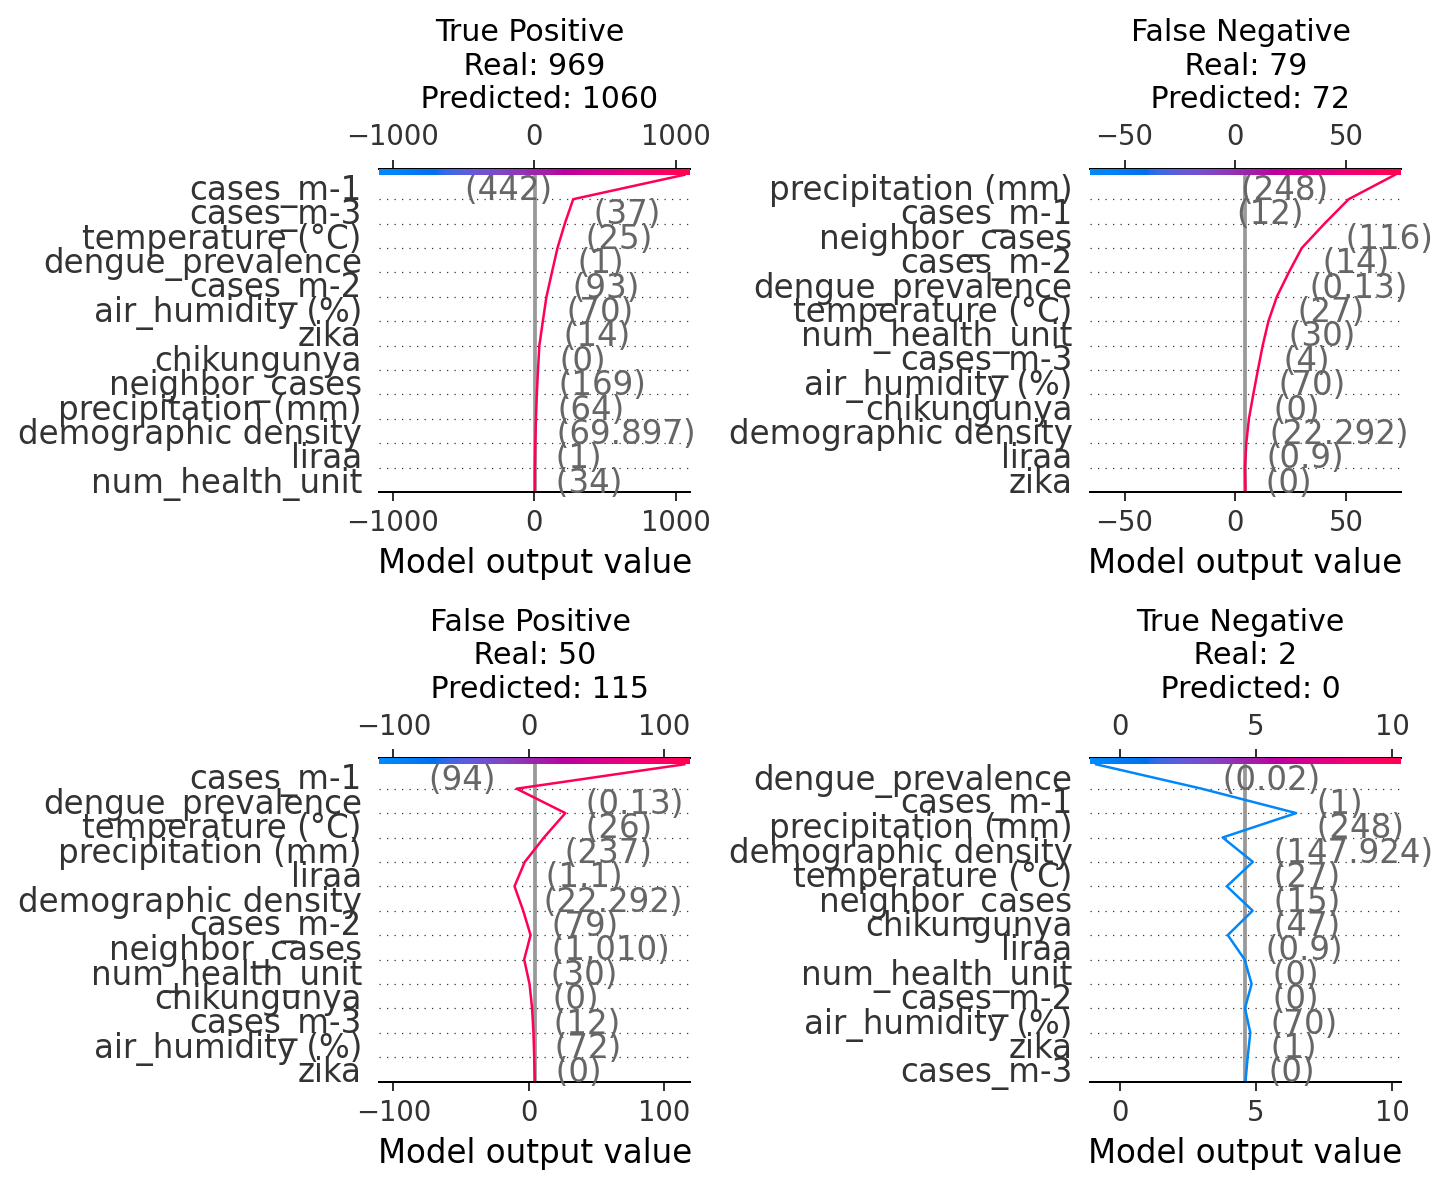

In [13]:
true_positive = 388
false_negative = 3308
false_positive = 3310
true_negative = 6828

x_train.columns = ['num_health_unit', 'precipitation (mm)', 'temperature (°C)',
       'air_humidity (%)', 'neighbor_cases', 'demographic density', 'zika', 'chikungunya',
        'dengue_prevalence', 'liraa', 'cases_m-1', 'cases_m-2', 'cases_m-3']

plt.figure(figsize=(30, 12), dpi=180)

# true positive
plt.subplot(2,2,1)
shap.decision_plot(explainer.expected_value, shap_values[true_positive, :],
                x_train.iloc[true_positive, :], show=False, title=f"True Positive \n Real: 969 \n Predicted: 1060")
# false negative
plt.subplot(2,2,2)
shap.decision_plot(explainer.expected_value, shap_values[false_negative, :],
                x_train.iloc[false_negative, :], show=False, title=f"False Negative \n Real: 79 \n Predicted: 72")
# false positive
plt.subplot(2,2,3)
shap.decision_plot(explainer.expected_value, shap_values[false_positive, :],
                x_train.iloc[false_positive, :], show=False, title=f"False Positive \n Real: 50 \n Predicted: 115")
# true negative
plt.subplot(2,2,4)
shap.decision_plot(explainer.expected_value, shap_values[true_negative, :],
                x_train.iloc[true_negative, :], show=False, title=f"True Negative \n Real: 2 \n Predicted: 0")
# plt.tight_layout()
plt.savefig(base_path + '/data_sus/finais/article_data/figure_6_shap_decision_plot.eps',
            dpi=180)
plt.tight_layout()
plt.show()